<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Demos_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demos logistic regression

## Student admission

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, datasets

In [ ]:
datasetAdmission = pd.read_csv('StudentAdmission.csv')
datasetAdmission.head()

,Score1,Score2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


**Scatterplot**

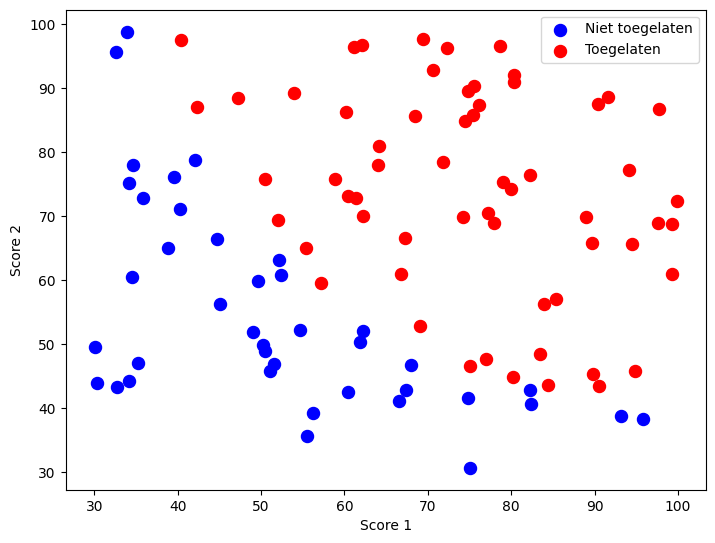

In [ ]:
x1 = datasetAdmission[['Score1']].values
x2 = datasetAdmission[['Score2']].values
y = datasetAdmission[['Admission']].values

zero_class = (y ==0)
one_class =  (y==1)


labels = ['Niet toegelaten', 'Toegelaten']
fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])
ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=75, label='Niet toegelaten')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=75, label='Toegelaten')
ax_admission.set_xlabel('Score 1')
ax_admission.set_ylabel('Score 2')
ax_admission.legend(loc=1,numpoints=1)

x1, x2, y: Splitst de data in individuele arrays voor Score1, Score2 en Admission.

zero_class en one_class: Booleaanse maskers voor respectievelijk niet-toegelaten (0) en toegelaten (1) studenten.

plt.figure(): Maakt een nieuwe lege figuur voor de plot.

ax_admission.scatter(...): Maakt een scatterplot voor beide klassen met verschillende kleuren (b voor niet-toegelaten, r voor toegelaten).

set_xlabel() en set_ylabel(): Stellen de aslabels in.

legend(): Voegt een legenda toe voor de twee klassen.



In [ ]:
features = list(datasetAdmission.columns[:2])
print(features)
X = datasetAdmission[features].values

y= datasetAdmission['Admission'].values

logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X, y)

['Score1', 'Score2']


LogisticRegression(C=100000.0, solver='liblinear')

LogisticRegression(C=1e5, solver='liblinear'):

C=1e5: Weinig regularisatie (sterkere fit).

solver='liblinear': Geschikt voor kleinere datasets.

fit(X, y): Past het model aan op de volledige dataset.



features: Bevat de namen van de kolommen die als features worden gebruikt (Score1 en Score2).

X: Matrix met alle features (Score1 en Score2).

y: Doelvariabele (Admission), bevat de labels (0 of 1).



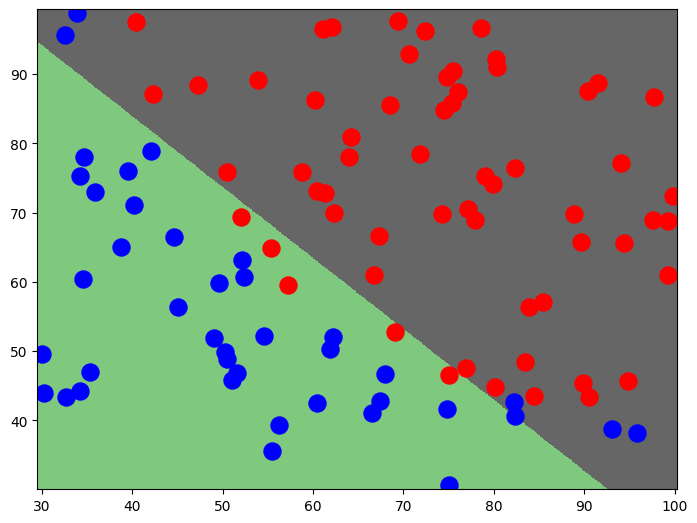

In [ ]:
# decision boundary
h = 0.1
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])

Z = Z.reshape(xx.shape)

ax_admission.pcolormesh(xx, yy, Z,cmap='Accent')

ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=150, label='Niet toegelaten')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=150, label='Toegelaten')

meshgrid: Maakt een fijn raster van coördinaten (xx, yy) voor het tekenen van de beslissingsgrens.

np.c_: Combineert xx en yy in een (n, 2) matrix voor voorspellingen.

Z.reshape(xx.shape): Zet de voorspelde labels (Z) terug naar de vorm van het raster voor de plot.

pcolormesh: Kleurt de achtergrond in op basis van de voorspelde klassen.

scatter: Plaatst de originele datapunten erbovenop.



In [ ]:
# Prediction with score1 = 45 and score2 = 85

print(logreg.predict(np.array([[45,85]])))

[1]


predict: Voorspelt of een student met Score1=45 en Score2=85 wordt toegelaten (1) of niet (0).

**Gebruiken van hogere orde features**

(347, 354)


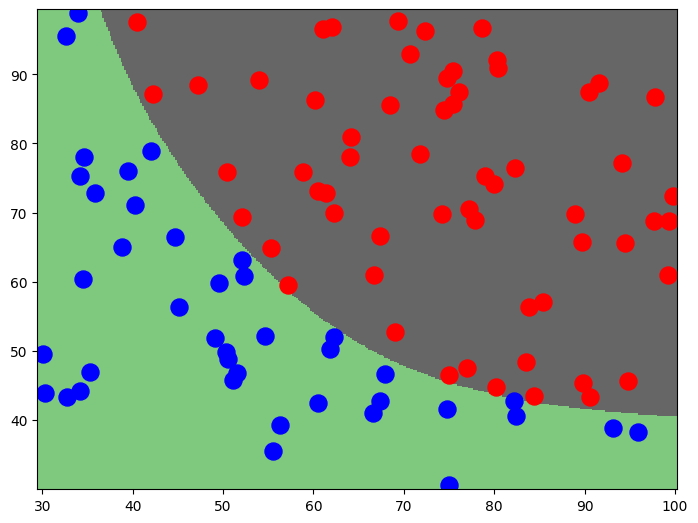

In [ ]:
# Higher order features
graad = 4

poly = PolynomialFeatures(graad)
Xp = poly.fit_transform(X)


# Train model

logreg_poly = linear_model.LogisticRegression(C=1,solver='liblinear')
logreg_poly.fit(Xp, y)


# decision boundary
h = 0.2
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

XXp = np.c_[xx.ravel(), yy.ravel()]


xx_p = poly.fit_transform(XXp)


Z = logreg_poly.predict(xx_p)

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])


print(xx.shape)
Z = Z.reshape(xx.shape)

ax_admission.pcolormesh(xx, yy, Z,cmap='Accent')

ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=150, label='Niet toegelaten')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=150, label='Toegelaten')




graad = 4: Kies een polynomiale graad van 4.

PolynomialFeatures: Transformeert de features naar een hogere-orde representatie (voegt termen zoals x1^2, x2^2, x1*x2, etc. toe).

fit_transform(X): Past deze transformatie toe op de originele features (X). C=1: Iets sterkere regularisatie om overfitting te voorkomen.

fit(Xp, y): Past het model aan met de hogere-orde features.

poly.fit_transform: Transformeert de meshgrid-data (XXp) naar hogere-orde features.

pcolormesh: Kleurt de achtergrond in op basis van de voorspelde klassen.

scatter: Plaatst de originele datapunten erbovenop.



## Quality control

In [ ]:
dataset_QC = pd.read_csv('Quality_Control.csv')
dataset_QC.head()

,Test1,Test2,Quality_OK
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Visualiseer de data met behulp van een scatterplot. Duid de twee verschillende klasses (geaccepteerd of verworpen) aan met een verschillend symbool of kleur.

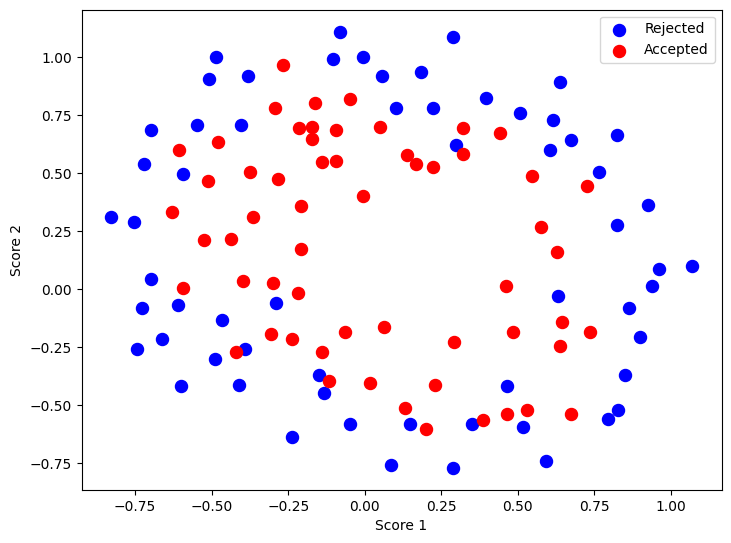

In [ ]:
# Scatterplot

x1 = dataset_QC[['Test1']].values
x2 = dataset_QC[['Test2']].values
y = dataset_QC[['Quality_OK']].values

zero_class = (y ==0)
one_class =  (y==1)


labels = ['Rejected', 'Accepted']
fig_QC = plt.figure()
ax_QC = fig_QC.add_axes([0,0,1,1])
ax_QC.scatter(x1[zero_class],x2[zero_class], c='b', s=75, label='Rejected')
ax_QC.scatter(x1[one_class], x2[one_class], c='r',s=75, label='Accepted')
ax_QC.set_xlabel('Score 1')
ax_QC.set_ylabel('Score 2')
ax_QC.legend(loc=1,numpoints=1)



 Deze code maakt een **scatterplot** voor de **Quality Control** (`QC`) dataset om de twee klassen (`Rejected` en `Accepted`) visueel te onderscheiden. Laten we dit stap voor stap uitleggen:

---

### **1. Uitsplitsen van de features en target**

```python
x1 = dataset_QC[['Test1']].values
x2 = dataset_QC[['Test2']].values
y = dataset_QC[['Quality_OK']].values
```

* **x1**: Extract de waarden van de kolom `Test1` als een numpy-array.
* **x2**: Extract de waarden van de kolom `Test2` als een numpy-array.
* **y**: Extract de doelvariabele `Quality_OK` als een numpy-array.

Voorbeeld van hoe de data eruit zou kunnen zien:

| Test1 | Test2 | Quality\_OK |
| ----- | ----- | ----------- |
| 85    | 90    | 1           |
| 45    | 60    | 0           |
| 78    | 88    | 1           |
| 35    | 50    | 0           |

Na deze stap heb je drie numpy-arrays:

* **x1**: `[[85], [45], [78], [35], ...]`
* **x2**: `[[90], [60], [88], [50], ...]`
* **y**: `[[1], [0], [1], [0], ...]`

---

### **2. Scheiden van de klassen (`Rejected` en `Accepted`)**

```python
zero_class = (y == 0)
one_class = (y == 1)
```

* **zero\_class**: Maakt een Booleaanse array die `True` is voor alle `0`-waarden (`Rejected`) en `False` voor alle `1`-waarden.
* **one\_class**: Maakt een Booleaanse array die `True` is voor alle `1`-waarden (`Accepted`) en `False` voor alle `0`-waarden.

Voorbeeld:

Als **y** de waarden `[[1], [0], [1], [0], [1]]` heeft, dan:

* **zero\_class**: `[False, True, False, True, False]`
* **one\_class**: `[True, False, True, False, True]`

---

### **3. Instellen van de labels voor de legenda**

```python
labels = ['Rejected', 'Accepted']
```

* Maakt een lijst met de labels voor de twee klassen.
* Wordt later gebruikt in de legenda.

---

### **4. Creëren van een lege figuur voor de scatterplot**

```python
fig_QC = plt.figure()
ax_QC = fig_QC.add_axes([0,0,1,1])
```

* **plt.figure()**: Maakt een nieuwe, lege figuur.
* **add\_axes(\[0,0,1,1])**: Voegt een assenstelsel (`axes`) toe dat de volledige figuur beslaat (van linksboven naar rechtsonder).

---

### **5. Plotten van de `Rejected` en `Accepted` klassen**

```python
ax_QC.scatter(x1[zero_class], x2[zero_class], c='b', s=75, label='Rejected')
ax_QC.scatter(x1[one_class], x2[one_class], c='r', s=75, label='Accepted')
```

* **scatter(x1\[zero\_class], x2\[zero\_class], c='b', s=75, label='Rejected')**:

  * Plot alle punten die behoren tot de `Rejected` klasse (`0`).
  * **c='b'**: Kleur de punten blauw.
  * **s=75**: Stel de grootte van de punten in op 75.
  * **label='Rejected'**: Zorg ervoor dat deze klasse correct in de legenda wordt weergegeven.

* **scatter(x1\[one\_class], x2\[one\_class], c='r', s=75, label='Accepted')**:

  * Plot alle punten die behoren tot de `Accepted` klasse (`1`).
  * **c='r'**: Kleur de punten rood.
  * **s=75**: Stel de grootte van de punten in op 75.
  * **label='Accepted'**: Zorg ervoor dat deze klasse correct in de legenda wordt weergegeven.

---

### **6. Instellen van de aslabels en legenda**

```python
ax_QC.set_xlabel('Score 1')
ax_QC.set_ylabel('Score 2')
ax_QC.legend(loc=1, numpoints=1)
```

* **set\_xlabel('Score 1')**: Zet de label van de x-as naar `Score 1`.
* **set\_ylabel('Score 2')**: Zet de label van de y-as naar `Score 2`.
* **legend(loc=1, numpoints=1)**:

  * **loc=1**: Plaatst de legenda in de rechterbovenhoek (positie `1`).
  * **numpoints=1**: Geeft aan dat elke klas slechts één symbool gebruikt in de legenda.

---

### **7. Resultaat**

De scatterplot zal nu:

* Blauwe punten tonen voor de `Rejected` (`Quality_OK=0`) samples.
* Rode punten tonen voor de `Accepted` (`Quality_OK=1`) samples.
* Een duidelijke legenda hebben met de labels `Rejected` en `Accepted`.
* Correct geëtiketteerde assen (`Score 1` en `Score 2`).

---



In [ ]:
X = np.concatenate((x1,x2),1)
y=y.ravel()
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X, y)

LogisticRegression(C=100000.0, solver='liblinear')

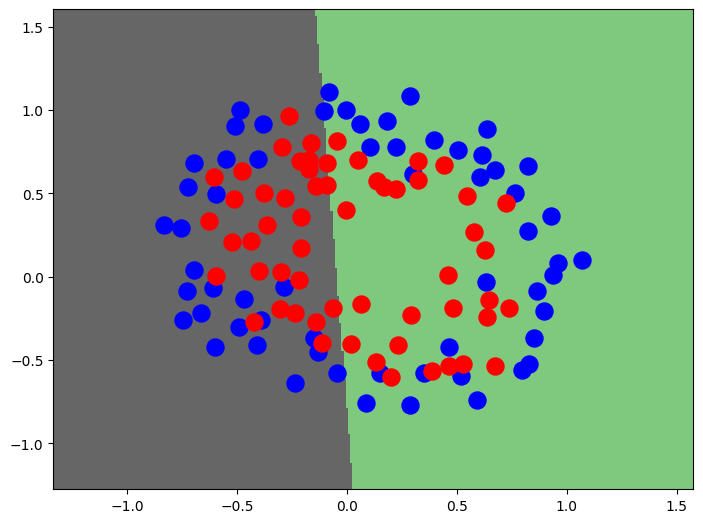

In [ ]:
# decision boundary
h = 0.01
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

fig_QC = plt.figure()
ax_QC = fig_QC.add_axes([0,0,1,1])

Z = Z.reshape(xx.shape)

ax_QC.pcolormesh(xx, yy, Z,cmap='Accent')

ax_QC.scatter(x1[zero_class],x2[zero_class], c='b', s=150, label='Rejected')
ax_QC.scatter(x1[one_class], x2[one_class], c='r',s=150, label='Accpeted')

Deze code creëert een **beslissingsgrens** voor een logistisch regressiemodel, zodat je kunt zien hoe goed het model de `Accepted` en `Rejected` klassen scheidt in de **Quality Control** dataset. Laten we de cel stap voor stap uitleggen:

---

### **1. Resolutie van het raster instellen**

```python
h = 0.01
```

* **h**: De stapgrootte voor het raster.
* Een kleinere waarde zoals `0.01` zorgt voor een fijnmaziger raster, wat de beslissingsgrens nauwkeuriger maakt, maar ook meer rekenkracht vereist.

---

### **2. Grenzen van de `Score 1` en `Score 2` features bepalen**

```python
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
```

* **X\[:, 0]**: Alle waarden van de eerste kolom (`Test1` of `Score 1`).
* **X\[:, 1]**: Alle waarden van de tweede kolom (`Test2` of `Score 2`).
* **min() en max()**: Bepaalt de minimale en maximale waarden voor `Score 1` en `Score 2`.
* **-0.5 en +0.5**: Voegt een marge toe aan de grenzen zodat de beslissingsgrens niet precies langs de rand van de punten loopt, wat de visualisatie duidelijker maakt.

Voorbeeld (als `Score 1` waarden tussen `30` en `90` liggen):

* **x1\_min** = 29.5
* **x1\_max** = 90.5

---

### **3. Genereren van een raster van coördinaten**

```python
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
```

* **np.arange(x1\_min, x1\_max, h)**: Maakt een 1D-array van waarden van `x1_min` tot `x1_max` met een stapgrootte van `h`.
* **np.meshgrid()**: Zet deze 1D-arrays om in twee 2D-arrays:

  * **xx**: Een matrix waarin elke rij een reeks `Score 1` waarden bevat.
  * **yy**: Een matrix waarin elke kolom een reeks `Score 2` waarden bevat.

Voorbeeld:

Als je `x1_min=0`, `x1_max=2`, `x2_min=0`, `x2_max=2` en `h=1` hebt:

$$
xx = \begin{bmatrix}
0 & 1 \\
0 & 1
\end{bmatrix}
$$

$$
yy = \begin{bmatrix}
0 & 0 \\
1 & 1
\end{bmatrix}
$$

---

### **4. Voorspellen van klassen voor elk punt in het raster**

```python
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
```

* **np.c\_\[xx.ravel(), yy.ravel()]**:

  * **ravel()**: Zet de 2D-arrays `xx` en `yy` om naar 1D-kolommen.
  * **np.c\_**: Combineert deze 1D-arrays in een `(n, 2)` matrix waarin elke rij een `(Score 1, Score 2)` paar is.

Voorbeeld (klein raster):

$$
\text{Input} = \begin{bmatrix}
0 & 0 \\
1 & 0 \\
0 & 1 \\
1 & 1
\end{bmatrix}
$$

* **logreg.predict(...)**: Voorspelt de klasse (`0` of `1`) voor elk coördinaatpaar.

---

### **5. Voorbereiden van de voorspelde labels voor de contourplot**

```python
Z = Z.reshape(xx.shape)
```

* Zet de voorspelde 1D-array `Z` terug naar de oorspronkelijke 2D-vorm van `xx` en `yy` zodat de contourplot correct wordt weergegeven.

---

### **6. Creëren van een lege figuur voor de plot**

```python
fig_QC = plt.figure()
ax_QC = fig_QC.add_axes([0,0,1,1])
```

* **plt.figure()**: Maakt een nieuwe lege figuur voor de plot.
* **add\_axes(\[0,0,1,1])**: Voegt een assenstelsel (`axes`) toe dat de volledige figuur beslaat (van linksboven naar rechtsonder).

---

### **7. Plotten van de beslissingsgrens (kleurvulling)**

```python
ax_QC.pcolormesh(xx, yy, Z, cmap='Accent')
```

* **pcolormesh**: Kleurt de achtergrond in op basis van de voorspelde klassen (`Z`).
* **cmap='Accent'**: Gebruikt het `Accent` kleurenschema voor de klasse-indeling.

---

### **8. Plotten van de originele datapunten**

```python
ax_QC.scatter(x1[zero_class], x2[zero_class], c='b', s=150, label='Rejected')
ax_QC.scatter(x1[one_class], x2[one_class], c='r', s=150, label='Accepted')
```

* **scatter(...)**:

  * **x1\[zero\_class], x2\[zero\_class]**: Plot alle `Rejected` (`0`) punten in blauw.
  * **x1\[one\_class], x2\[one\_class]**: Plot alle `Accepted` (`1`) punten in rood.
  * **s=150**: Maakt de punten groter voor een duidelijkere visualisatie.
  * **label**: Voegt labels toe voor de legenda.

---

### **9. Resultaat**

De plot zal:

* De **beslissingsgrens** als gekleurde vlakken weergeven (`Accent` colormap).
* De **oorspronkelijke punten** weergeven:

  * **Blauw** voor `Rejected` (`0`).
  * **Rood** voor `Accepted` (`1`).

---

### **10. Mogelijke verbeteringen**

Je kunt de visualisatie nog verbeteren door:

* **Aslabels** toe te voegen (`Score 1` en `Score 2`).
* **Limieten** voor de assen te zetten.
* **Een legenda** toe te voegen voor duidelijkere interpretatie.



**Higher order features**


(288, 291)


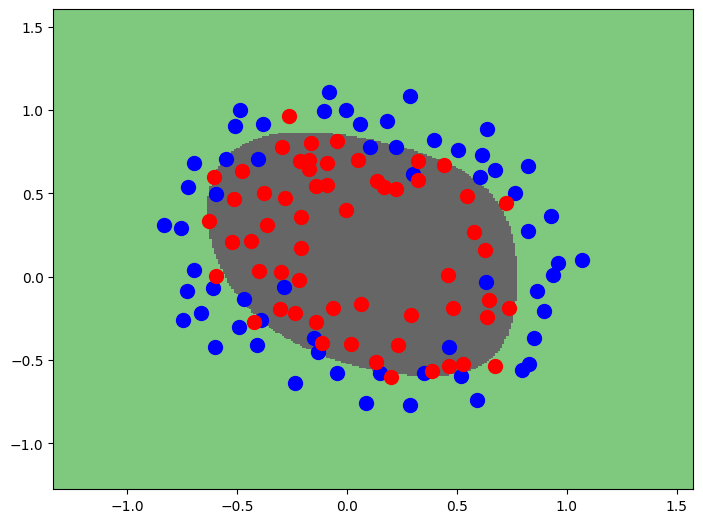

In [ ]:
degree = 10

poly = PolynomialFeatures(degree)
Xp = poly.fit_transform(X)



logreg_poly = linear_model.LogisticRegression(C=5,solver='liblinear')
logreg_poly.fit(Xp, y)


h = 0.01
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

XXp = np.c_[xx.ravel(), yy.ravel()]


xx_p = poly.fit_transform(XXp)


Z = logreg_poly.predict(xx_p)

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])


print(xx.shape)
Z = Z.reshape(xx.shape)

ax_admission.pcolormesh(xx, yy, Z,cmap='Accent')

ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=100, label='Rejected')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=100, label='Accepted')


Deze code traint een **hogere-orde logistisch regressiemodel** met **polynomiale features** om een complexe, niet-lineaire beslissingsgrens te leren. Dit is vooral nuttig wanneer de data niet lineair separabel is. Laten we de cel stap voor stap uitleggen:

---

### **1. Genereren van hogere-orde features**

```python
degree = 10

poly = PolynomialFeatures(degree)
Xp = poly.fit_transform(X)
```

* **degree = 10**: Stelt de graad van de polynomiale features in op 10, wat betekent dat we tot de 10e macht feature-interacties meenemen.
* **PolynomialFeatures(degree)**:

  * Voegt termen toe zoals $x_1^2$, $x_2^2$, $x_1 \cdot x_2$, $x_1^3$, $x_2^3$, enz.
* **fit\_transform(X)**:

  * Transformeert de originele 2D-featurematrix (`X`) naar een veel uitgebreidere featurematrix (`Xp`).

Voorbeeld van een eenvoudige polynomiale uitbreiding (graad 2):

Als je **X** hebt met 2 kolommen (`Score1` en `Score2`), dan krijg je:

$$
[1, x_1, x_2, x_1^2, x_1 x_2, x_2^2, x_1^3, x_2^3, \ldots, x_2^{10}]
$$

**Dimensies van Xp bij graad 10 (twee originele features)**:

$$
\text{Aantal kolommen} = \frac{(n + d)!}{d! \cdot n!} = \frac{(2+10)!}{10! \cdot 2!} = 66
$$

---

### **2. Trainen van het logistische regressiemodel**

```python
logreg_poly = linear_model.LogisticRegression(C=5,solver='liblinear')
logreg_poly.fit(Xp, y)
```

* **C=5**: Iets sterkere regularisatie om overfitting te beperken, maar nog steeds vrij flexibel.
* **solver='liblinear'**: Geschikt voor kleinere datasets en goed voor L1- en L2-regularisatie (hier L2).
* **fit(Xp, y)**: Past het model aan op de uitgebreide featurematrix (`Xp`) en de doelvariabele (`y`).

---

### **3. Genereren van het meshgrid voor de beslissingsgrens**

```python
h = 0.01
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
```

* **h = 0.01**: Stapgrootte voor het raster, bepaalt de resolutie van de beslissingsgrens.
* **x1\_min en x1\_max**: Minimaal en maximaal bereik voor `Score 1` met een marge van 0.5.
* **x2\_min en x2\_max**: Minimaal en maximaal bereik voor `Score 2` met een marge van 0.5.
* **np.meshgrid()**:

  * Creëert een raster van `(Score 1, Score 2)` coördinaten.
  * **xx** bevat de `Score 1` waarden.
  * **yy** bevat de `Score 2` waarden.

---

### **4. Transformeren van het raster naar hogere-orde features**

```python
XXp = np.c_[xx.ravel(), yy.ravel()]
xx_p = poly.fit_transform(XXp)
```

* **np.c\_**: Combineert de 1D-arrays `xx.ravel()` en `yy.ravel()` tot een `(n, 2)` matrix waarin elke rij een `(Score 1, Score 2)` paar is.
* **poly.fit\_transform(XXp)**:

  * Transformeert deze coördinaten naar dezelfde hogere-orde feature-ruimte als je model.
  * Zorgt ervoor dat de meshgrid data (`XXp`) dezelfde kolomstructuur heeft als je trainingsdata (`Xp`).

---

### **5. Voorspellen van klassen voor elk punt in het raster**

```python
Z = logreg_poly.predict(xx_p)
```

* **predict(xx\_p)**: Voorspelt de klasse (`0` of `1`) voor elke rij in de uitgebreide meshgrid-featurematrix (`xx_p`).
* Dit geeft een lange 1D-array `Z` terug met voorspelde klassen.

---

### **6. Omvormen voor de contourplot**

```python
print(xx.shape)
Z = Z.reshape(xx.shape)
```

* **Z.reshape(xx.shape)**:

  * Zet de platte voorspelde klasse-array (`Z`) terug naar de 2D-vorm van `xx` en `yy`, zodat de contourplot correct kan worden weergegeven.
* **print(xx.shape)**:

  * Laat de vorm van de originele 2D-matrix (`xx`) zien, wat bijvoorbeeld `(600, 600)` kan zijn voor een fijnmazig raster.

---

### **7. Creëren van een lege figuur voor de plot**

```python
fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])
```

* **plt.figure()**: Maakt een nieuwe, lege figuur.
* **add\_axes(\[0,0,1,1])**: Voegt een assenstelsel (`axes`) toe dat de volledige figuur beslaat.

---

### **8. Plotten van de beslissingsgrens (kleurvulling)**

```python
ax_admission.pcolormesh(xx, yy, Z, cmap='Accent')
```

* **pcolormesh(xx, yy, Z, cmap='Accent')**:

  * Kleurt de achtergrond in op basis van de voorspelde klassen (`Z`).
  * **cmap='Accent'** gebruikt een helder kleurenpalet voor duidelijk contrast.

---

### **9. Plotten van de originele datapunten**

```python
ax_admission.scatter(x1[zero_class], x2[zero_class], c='b', s=100, label='Rejected')
ax_admission.scatter(x1[one_class], x2[one_class], c='r', s=100, label='Accepted')
```

* **scatter(...)**:

  * **x1\[zero\_class], x2\[zero\_class]**: Plot alle `Rejected` (`0`) punten in blauw.
  * **x1\[one\_class], x2\[one\_class]**: Plot alle `Accepted` (`1`) punten in rood.
  * **s=100**: Stelt de grootte van de punten in op 100 voor betere zichtbaarheid.
  * **label**: Voegt labels toe voor de legenda.

---

### **10. Resultaat**

De plot zal:

* De **beslissingsgrens** tonen als gekleurde vlakken.
* De **originele datapunten** tonen:

  * **Blauw** voor `Rejected` (`0`).
  * **Rood** voor `Accepted` (`1`).

---

### **11. Mogelijke verbeteringen**

Je kunt de visualisatie verder verbeteren door:

* **Aslabels** toe te voegen (`Score 1` en `Score 2`).
* **Limieten** voor de assen in te stellen.
* **Een legenda** toe te voegen voor duidelijkere interpretatie.
* **Contourlijnen** toe te voegen om de grens duidelijker te maken.
